## Name: Aman P

## Implement the CNN model for classifying CIFAR10 image dataset by dividing the model into following 4 stages:
    a. Loadingand preprocessing the image data
    b. Defining the model's architecture
    c. Training the model
    d. Estimating the model's performance 

In [1]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy


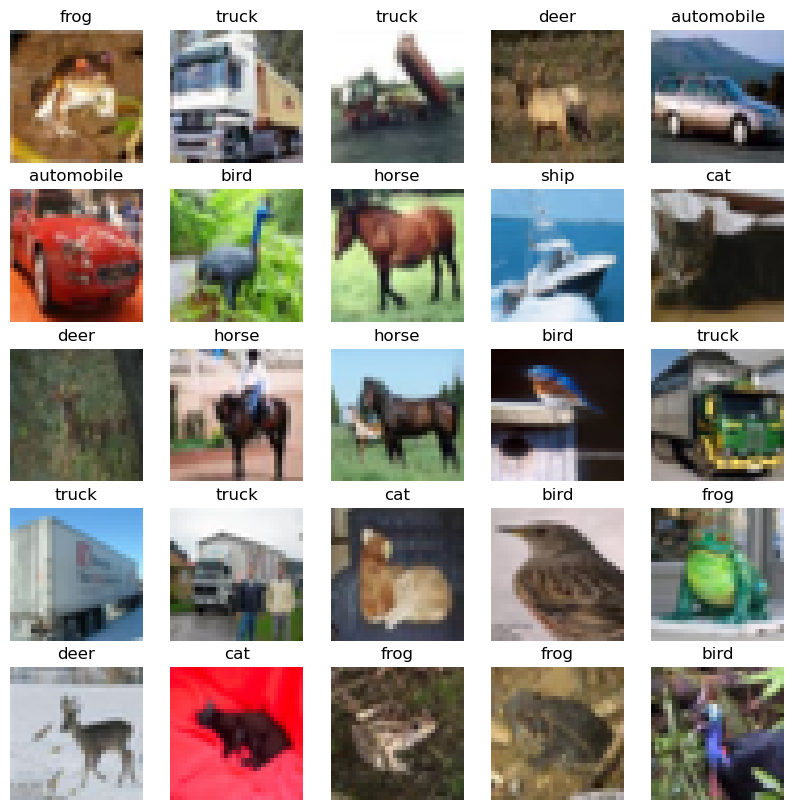

In [7]:
import pandas as pd
# Load the CIFAR-10 dataset
# Load CIFAR-10 data from CSV files
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

# Extract features and labels from the data
X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values

X_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

# Display a few sample images from different classes
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Display a few sample images from different classes
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)

    # Reshape the flattened image back to its original shape
    img = X_train[i].reshape(32, 32, 3)

    plt.imshow(img)
    plt.title(classes[y_train[i]])
    plt.axis("off")
plt.show()


X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(X_train.shape[0], 32,32,3)
X_test = X_test.reshape(X_test.shape[0],32,32,3)


y_train = y_train.flatten()
y_test = y_test.flatten()


In [8]:
X_train  = X_train/255.0
X_test = X_test/255.0

In [9]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [11]:
model = Sequential([
    Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)),
    MaxPool2D((2,2)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(16,(3,3),activation='relu'),
    Flatten(),
    Dense(16,activation='relu'),
    Dense(10,activation='softmax')
    
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 16)          4624      
                                                                 
 flatten_1 (Flatten)         (None, 256)              

In [12]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(optimizer='adam',loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [13]:
epochs = 2
H = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs)

Epoch 1/2


2023-11-15 23:46:39.910009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 23s 14ms/step - loss: 2.3028 - accuracy: 0.0978 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/2
1563/1563 [==============================] - 22s 14ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000


313/313 [==============================] - 1s 4ms/step


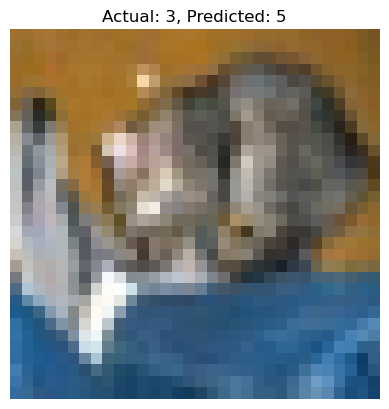

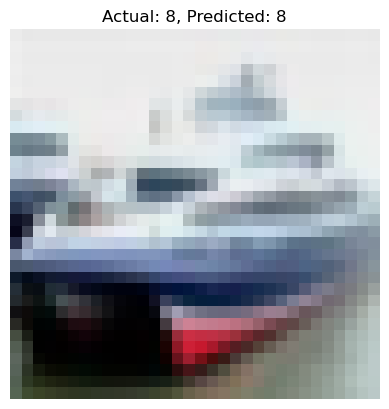

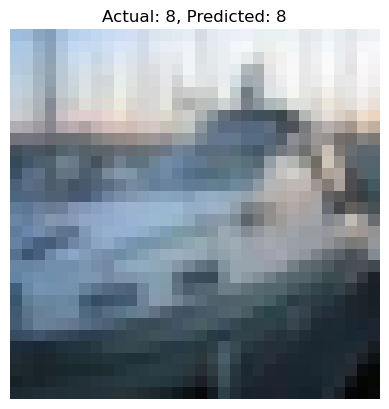

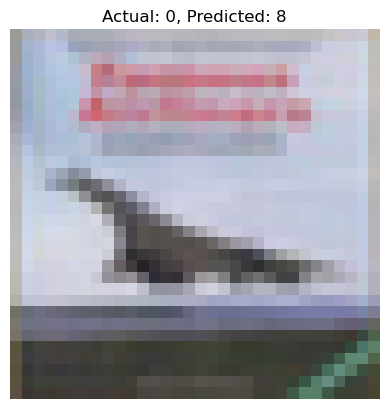

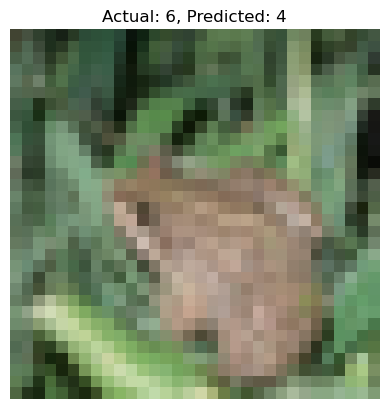

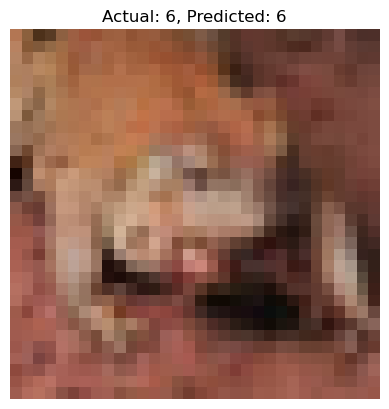

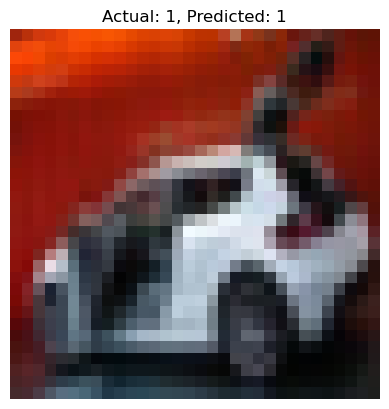

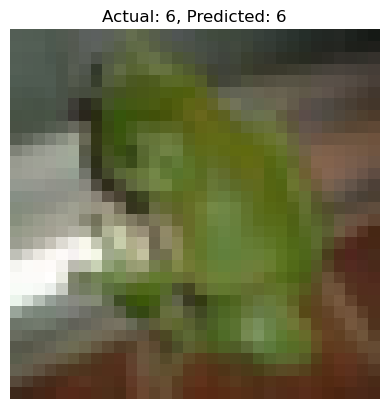

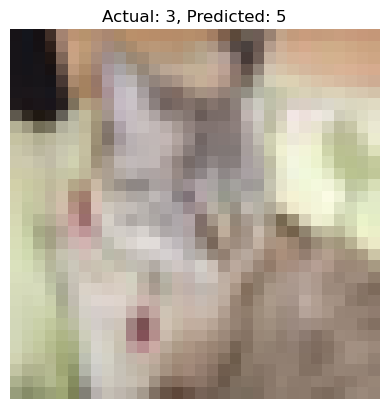

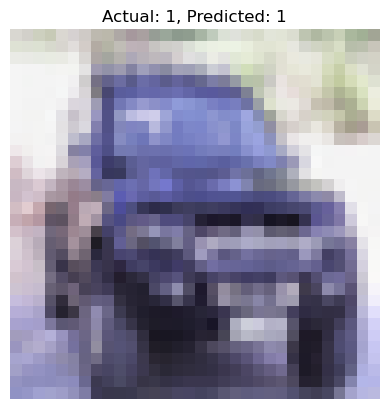

In [31]:
# Predictions
predictions = model.predict(X_test)

# Function to display actual and predicted labels with images
def display_actual_vs_predicted(n):
    actual_label = y_test[n]
    predicted_label = np.argmax(predictions[n])

    plt.imshow(X_test[n])
    plt.title(f'Actual: {actual_label}, Predicted: {predicted_label}')
    plt.axis("off")
    plt.show()

# Display a few examples
for i in range(10):
    display_actual_vs_predicted(i)

In [32]:
from sklearn.metrics import classification_report
predition = model.predict(X_test)
print(classification_report(y_test,predition.argmax(axis=1)))

313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.55      0.51      0.53      1000
           1       0.73      0.50      0.59      1000
           2       0.35      0.33      0.34      1000
           3       0.32      0.15      0.21      1000
           4       0.37      0.36      0.37      1000
           5       0.38      0.48      0.42      1000
           6       0.43      0.66      0.52      1000
           7       0.47      0.61      0.53      1000
           8       0.55      0.61      0.58      1000
           9       0.65      0.50      0.57      1000

    accuracy                           0.47     10000
   macro avg       0.48      0.47      0.47     10000
weighted avg       0.48      0.47      0.47     10000



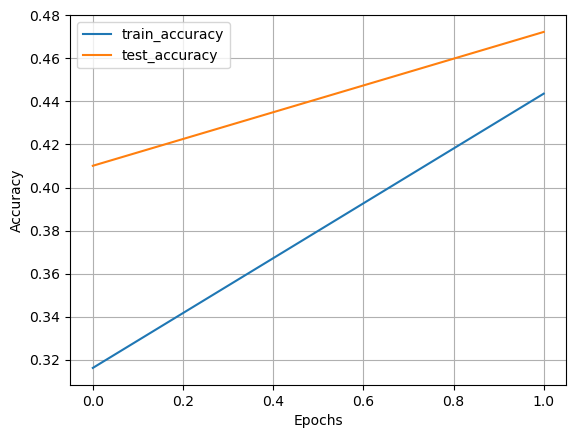

In [33]:
import matplotlib.pyplot as plt
plt.plot(range(0,epochs),H.history['accuracy'],label = 'train_accuracy')
plt.plot(range(0,epochs),H.history['val_accuracy'],label = 'test_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

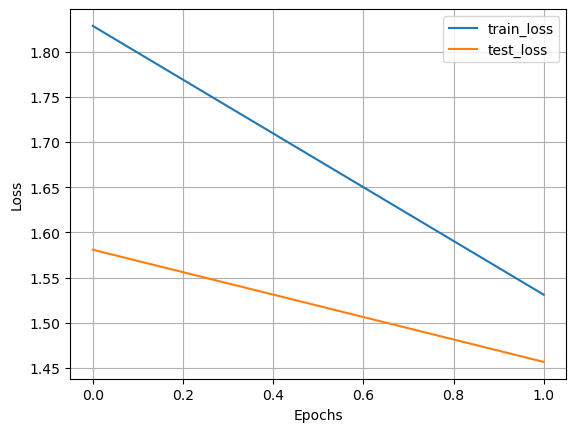

In [34]:
import matplotlib.pyplot as plt
plt.plot(range(0,epochs),H.history['loss'],label = 'train_loss')
plt.plot(range(0,epochs),H.history['val_loss'],label = 'test_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid();